In [1]:
import matplotlib.pyplot as plt 
from NRoutines.assembling import DME_heat, assembler_heat, loadasem
from NRoutines.postprocesor import complete_disp, fields_plot, temperature_gradients_nodes
import numpy as np

In [2]:
def readin():
    nodes    = np.loadtxt('Files_2/' + 'nodes.txt', ndmin=2)
    mats     = np.loadtxt('Files_2/' + 'mater.txt', ndmin=2)
    elements = np.loadtxt('Files_2/' + 'eles.txt', ndmin=2, dtype=int)
    loads    = np.loadtxt('Files_2/' + 'loads.txt', ndmin=2)

    return nodes, mats, elements, loads

In [3]:
nodes, mats, elements, loads = readin()

In [4]:
DME, IBC, neq = DME_heat(nodes, elements)

In [5]:
DME

array([[-1, -1,  5,  4],
       [-1, -1,  2,  5],
       [ 4,  5,  3,  1],
       [ 5,  2,  0,  3]])

In [6]:
IBC

array([-1, -1,  0,  1, -1,  2,  3,  4,  5])

In [7]:
KG = assembler_heat(elements, mats, nodes, neq, DME)
KG

array([[ 0.66666667,  0.        , -0.16666667, -0.16666667,  0.        ,
        -0.33333333],
       [ 0.        ,  0.66666667,  0.        , -0.16666667, -0.16666667,
        -0.33333333],
       [-0.16666667,  0.        ,  1.33333333, -0.33333333,  0.        ,
        -0.33333333],
       [-0.16666667, -0.16666667, -0.33333333,  1.33333333, -0.33333333,
        -0.33333333],
       [ 0.        , -0.16666667,  0.        , -0.33333333,  1.33333333,
        -0.33333333],
       [-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
         2.66666667]])

In [8]:
loads

array([[3., 1.],
       [6., 1.],
       [2., 1.]])

In [9]:
RHS = loadasem(loads, IBC, neq)
RHS

array([1., 1., 0., 1., 0., 0.])

In [10]:
from numpy.linalg import solve

U_sol = solve(KG, RHS)
U_sol

array([3.30612245, 3.30612245, 1.46938776, 2.69387755, 1.46938776,
       1.53061224])

In [11]:
UC = complete_disp(IBC, nodes, U_sol)
UC

array([0.        , 0.        , 3.30612245, 3.30612245, 0.        ,
       1.46938776, 2.69387755, 1.46938776, 1.53061224])

In [12]:
Et, Eq = temperature_gradients_nodes(nodes, elements, mats, UC)

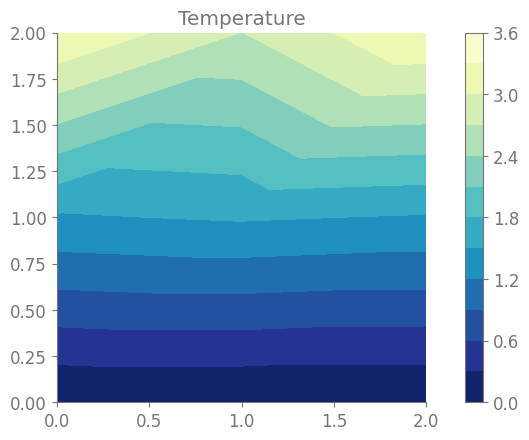

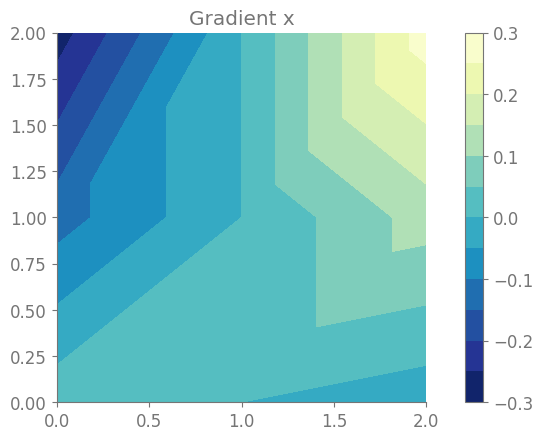

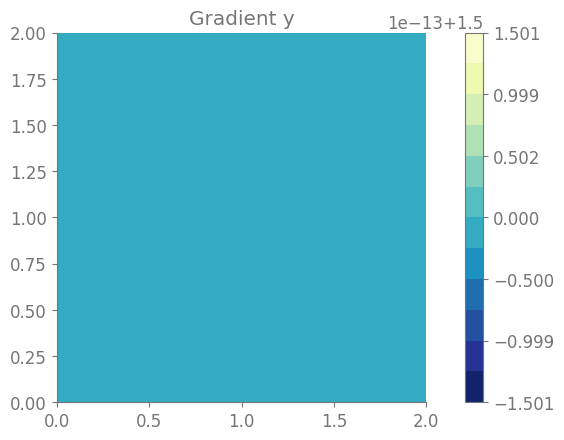

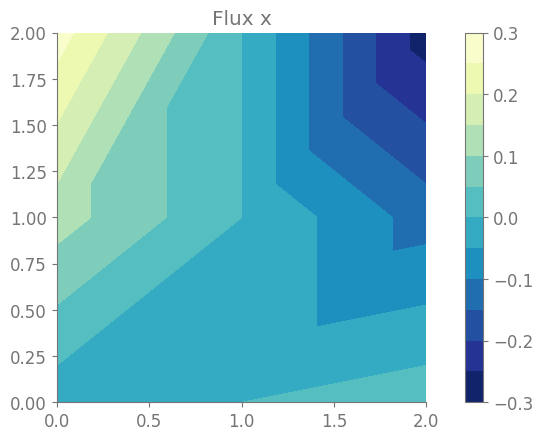

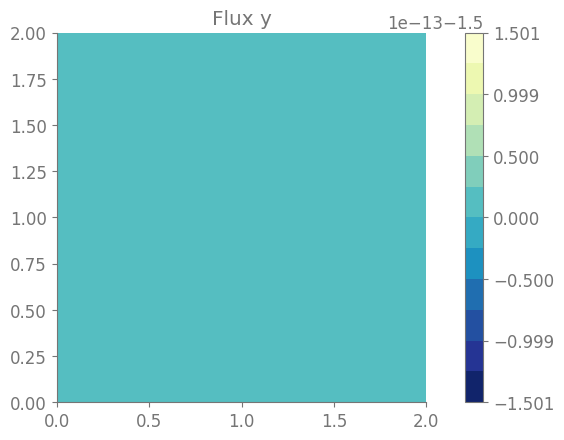

In [13]:
fields_plot(elements, nodes, UC, Et, Eq)